In [480]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
filename = 'scrapy.json'
with open('scrapy.json', 'r') as f:
    questions = json.loads(f.read())
with open('nutch.json', 'r') as f:
    questions_nutch = json.loads(f.read())

In [481]:
# common functions
from statistics import mean, median
def inspect_votes(qs):
    print('[Votes]')
    votes = [q['score'] for q in qs]
    print('  votes sum      : ', sum(votes))
    print('  votes mean     :  {:.2f}'.format(mean(votes)))
    print('  total questions:  ', len(qs))
def inspect_questions(qs, vs_all=False, owner=False, answer=True):
    answered = [q for q in qs if q['is_answered']]
    prc = lambda v, total: len(v) * 100 / len(total)
    print('[Questions]')
    print('  total questions:  ', len(qs))
    if answer:
        print('  % answered     :  {:.2f}'.format(prc(answered, qs)))
        score0 = [q for q in qs if q['score'] == 0]
        print('  % 0 score      :  {:.2f}'.format(prc(score0, qs)))
        score0_answered = [q for q in answered if q['score'] == 0]
        print('    of answered  :  {:.2f}'.format(prc(score0_answered, answered)))
    if vs_all:
        print('compared to all questions:')
        print('  total             :', '{}/{}'.format(len(qs), len(questions)))
        print('  % of all questions: {:.2f}'.format(prc(qs, questions)))
    if owner:
        print('question owner data:')
        from datetime import datetime
        qs_with_time = [q for q in qs if q['owner'].get('creation_date')]
        times = []
        for q in qs_with_time:
            owner = datetime.fromtimestamp(q['owner']['creation_date'])
            qdate = datetime.fromtimestamp(q['creation_date'])
            time = qdate - owner
            times.append(time.days)
        print('  average asker account age: {:.2f} days'.format(mean(times)))
        print('  median: {:.2f} days'.format(median(times)))

# General [scrapy] info

In [482]:
inspect_questions(questions, owner=True)
inspect_votes(questions)
first = sorted(questions, key=lambda v: v['creation_date'])[0]
print('[Other]')
print('* First question asked on', datetime.fromtimestamp(first['creation_date']))


[Questions]
  total questions:   6314
  % answered     :  68.69
  % 0 score      :  43.66
    of answered  :  36.38
question owner data:
  average asker account age: 472.29 days
  median: 298.00 days
[Votes]
  votes sum      :  8054
  votes mean     :  1.28
  total questions:   6314
[Other]
* First question asked on 2009-06-29 05:09:33


- answered ratio appears to be small but for stackoverflow it's usual
    - actually is really high for SO standards 
    - \+ hard to ask generic questions for scrapy
- a lot of questions with score 0
- a lot of answered questions with score 0 too
- low mean of questions

In [483]:
print("Apache Nutch - scrapy competitor's info:")
inspect_questions(questions_nutch, owner=True)
inspect_votes(questions_nutch)
first = sorted(questions_nutch, key=lambda v: v['creation_date'])[0]
print('[Other]')
print('* First question asked on', datetime.fromtimestamp(first['creation_date']))

Apache Nutch - scrapy competitor's info:
[Questions]
  total questions:   1198
  % answered     :  55.59
  % 0 score      :  54.59
    of answered  :  48.80
question owner data:
  average asker account age: 414.23 days
  median: 240.00 days
[Votes]
  votes sum      :  963
  votes mean     :  0.80
  total questions:   1198
[Other]
* First question asked on 2008-10-15 12:27:12


- scrapy 2008(v.1 2015) vs nutch 2010 (v.1.1)
- scrapy is more popular

# Specific Questions

### CrawlSpider questions

In [484]:
print('CrawlSpider questions:\n---------')
crawl_questions = [q for q in questions if 'CrawlSpider' in q['body']]
inspect_questions(crawl_questions, vs_all=True, owner=True)
print('\nscrapy.Spider questions\n---------')
import re
re_spider = re.compile(r'(?:\b|\.)Spider\b')
spider_questions = [q for q in questions if re_spider.search(q['body'])]
inspect_questions(spider_questions, vs_all=True)
print('\nSitemap spiders:\n---------')
sitemap_questions = [q for q in questions if 'SitemapSpider' in q['body']]
inspect_questions(sitemap_questions, vs_all=True)


CrawlSpider questions:
---------
[Questions]
  total questions:   995
  % answered     :  69.45
  % 0 score      :  41.51
    of answered  :  33.57
compared to all questions:
  total             : 995/6314
  % of all questions: 15.76
question owner data:
  average asker account age: 396.04 days
  median: 222.00 days

scrapy.Spider questions
---------
[Questions]
  total questions:   1438
  % answered     :  64.74
  % 0 score      :  46.80
    of answered  :  38.99
compared to all questions:
  total             : 1438/6314
  % of all questions: 22.77

Sitemap spiders:
---------
[Questions]
  total questions:   20
  % answered     :  55.00
  % 0 score      :  30.00
    of answered  :  18.18
compared to all questions:
  total             : 20/6314
  % of all questions: 0.32


- CrawlSpider is very popular, compared to base Spider it's 1:2
    - or that CrawlSpider raises a lot of questions
- Other Spiders (like Sitemap) are not popular at all :(


### AJAX and Selenium related questions

In [485]:
import re
re_ajax = re.compile(r'\bajax\b', flags=re.I)
re_js = re.compile(r'\bjavascript\b', flags=re.I)
re_selenium = re.compile(r'\bselenium\b', flags=re.I)

print('Questions with ajax in body')
qs = [q for q in questions if re_ajax.search(q['body'])]
inspect_questions(qs, vs_all=True, answer=False)

print('\nQuestions with ajax in answer')
in_answer = [q for q in questions 
             if re_ajax.search(''.join([a['body'] for a in q.get('answers', [{'body': ''}])]))]
inspect_questions(in_answer, vs_all=True, answer=False)

print('\nQuestions with javascript in answer')
in_answer_js = [q for q in questions
               if re_js.search(q.get('answers', [{'body': ''}])[0]['body'])]
inspect_questions(in_answer_js, vs_all=True, answer=False)

print('\nQuestions with selenium in answer')
in_answer_selenium = [q for q in questions
               if re_selenium.search(q.get('answers', [{'body': ''}])[0]['body'])]
inspect_questions(in_answer_selenium, vs_all=True, answer=False)

Questions with ajax in body
[Questions]
  total questions:   133
compared to all questions:
  total             : 133/6314
  % of all questions: 2.11

Questions with ajax in answer
[Questions]
  total questions:   122
compared to all questions:
  total             : 122/6314
  % of all questions: 1.93

Questions with javascript in answer
[Questions]
  total questions:   235
compared to all questions:
  total             : 235/6314
  % of all questions: 3.72

Questions with selenium in answer
[Questions]
  total questions:   192
compared to all questions:
  total             : 192/6314
  % of all questions: 3.04


- very few questions related to AJAX (or so it appears to be)
- top 5 contains

## Inspecting related tags

In [486]:
questions = questions
tags = [q['tags'] for q in questions]
tags = [el for t in tags for el in t]
import math
# counting tags
from collections import Counter
counter = Counter(tags)
del counter['scrapy']
del counter['python']
items = [(k,int(v)) for k,v in counter.items()]
items = [(k, math.ceil(v*100/len(questions))) for k,v in items]
items = sorted(items, key=lambda v: v[1], reverse=True)
# combine lowest
lowest = min(el[1] for el in items)
items = [(k, v) for k,v in items if v != lowest]
items.append(('other', lowest))
# printing
longest_name = sorted([k[0] for k in items], key=len)[-1]
tpl = '  {{:{ln}}} {{}}'.format(ln=len(longest_name))
print('Total tags:', len(counter.keys()))
print('Tag %     : ')
print('\n'.join([tpl.format(k,v) for k,v in items][:10]))

Total tags: 871
Tag %     : 
  web-scraping    22
  web-crawler     14
  xpath           13
  scrapy-spider   12
  python-2.7      10
  html            4
  selenium        3
  regex           3
  django          3
  scrapyd         3


Visual:


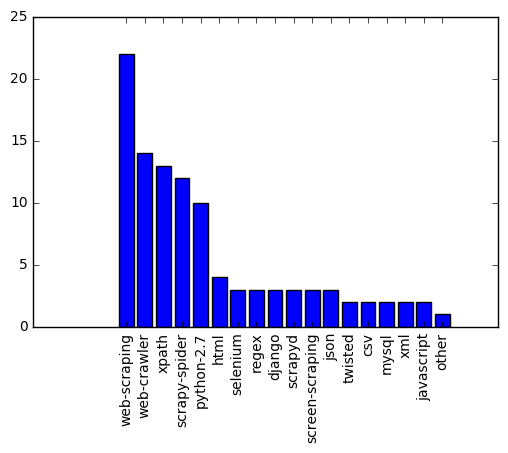

In [487]:
# paint graph
plt.bar(range(len(items)), [i[1] for i in items], align='center')
labels = [v[0] for v in items]
plt.xticks(range(len(items)), [v[0] for v in items], rotation='vertical')
print('Visual:')
plt.show()

**notes:**
- Majority of the related tags are very close to web-crawling.
- `selenium` is surprisingly high at 8%.
- `osx` - mostly about installation difficulties.
- `python-3.x` - yay, python 3 adoption! \o/

- Surpsiginly almost no mention of AJAX or related.